# Homework 4 - Assignment: High Frequency Words
###### Stefano Biguzzi, Ian Costello, Dennis Pong

## Assignment Description

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

## Assignment Steps

In [1]:
from urllib import request
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
%matplotlib inline

In [2]:
# https://blog.ekbana.com/pre-processing-text-in-python-ad13ea544dae

url = 'https://www.gutenberg.org/files/2449/2449.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')
type(raw)
len(raw)
raw[:75]

'The Project Gutenberg EBook of The Common Law, by Oliver Wendell Holmes, Jr'

In [3]:
def to_lower(text):
    return ' '.join([w.lower() for w in word_tokenize(text)])

raw = to_lower(raw)
raw[:75]

'the project gutenberg ebook of the common law , by oliver wendell holmes , '

In [4]:
raw = ''.join(c for c in raw if not c.isdigit())
raw[:705]

'the project gutenberg ebook of the common law , by oliver wendell holmes , jr . this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever . you may copy it , give it away or re-use it under the terms of the project gutenberg license included with this ebook or online at www.gutenberg.org title : the common law author : oliver wendell holmes , jr. release date : december ,  [ etext #  ] last updated : july  ,  language : english character set encoding : ascii * * * start of this project gutenberg ebook the common law * * * produced by stuart e. thiel the common law by oliver wendell holmes , jr . conventions : numbers in square brackets ( e.g . [  ] ) refer'

In [5]:
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

raw = strip_punctuation(raw)
raw[:705]

'the project gutenberg ebook of the common law  by oliver wendell holmes  jr  this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever  you may copy it  give it away or reuse it under the terms of the project gutenberg license included with this ebook or online at wwwgutenbergorg title  the common law author  oliver wendell holmes  jr release date  december    etext    last updated  july    language  english character set encoding  ascii    start of this project gutenberg ebook the common law    produced by stuart e thiel the common law by oliver wendell holmes  jr  conventions  numbers in square brackets  eg      refer to original page numbers  original f'

In [6]:
word_tokens = word_tokenize(raw)
word_tokens[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'common',
 'law',
 'by',
 'oliver']

In [7]:
stop_words = set(stopwords.words('english'))
clean_word_list = [w for w in word_tokens if not w.lower() in stop_words]
clean_word_list[:10]

['project',
 'gutenberg',
 'ebook',
 'common',
 'law',
 'oliver',
 'wendell',
 'holmes',
 'jr',
 'ebook']

In [8]:
word_dist = nltk.FreqDist(clean_word_list)
unique_words = len(set(word_dist))

total_words = float(len(clean_word_list))
print("Unique Words:",unique_words, "| Total Words:",total_words)

Unique Words: 8216 | Total Words: 62795.0


In [9]:
word_df = pd.DataFrame(list(word_dist.items()),columns = ['Word', 'Frequency']).sort_values(by=['Frequency'],ascending=False)
word_df['Cumulative_Freq'] = word_df['Frequency'].cumsum()
word_df.loc[word_df['Cumulative_Freq'] <= 31398]

,Word,Frequency,Cumulative_Freq
4,law,804,804
3017,v,499,1303
346,case,479,1782
790,would,467,2249
203,one,434,2683
...,...,...,...
440,took,33,31247
824,came,33,31280
192,degree,33,31313
909,regarded,33,31346


In [22]:
# add row for number in index and multiple for theoretical zipfs

top_words = word_df[:200]
top_words['Rank'] = range(1, 1+len(top_words))
top_words['Zipf'] = 804 / top_words['Rank']
top_words

<ipython-input-22-500770052900>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_words['Rank'] = range(1, 1+len(top_words))
<ipython-input-22-500770052900>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_words['Zipf'] = 804 / top_words['Rank']


,Word,Frequency,Cumulative_Freq,Rank,Zipf
4,law,804,804,1,804.000000
3017,v,499,1303,2,402.000000
346,case,479,1782,3,268.000000
790,would,467,2249,4,201.000000
203,one,434,2683,5,160.800000
...,...,...,...,...,...
1405,others,57,23556,196,4.102041
2161,latter,56,23612,197,4.081218
4562,warranty,56,23668,198,4.060606
8049,gutenbergtm,56,23724,199,4.040201


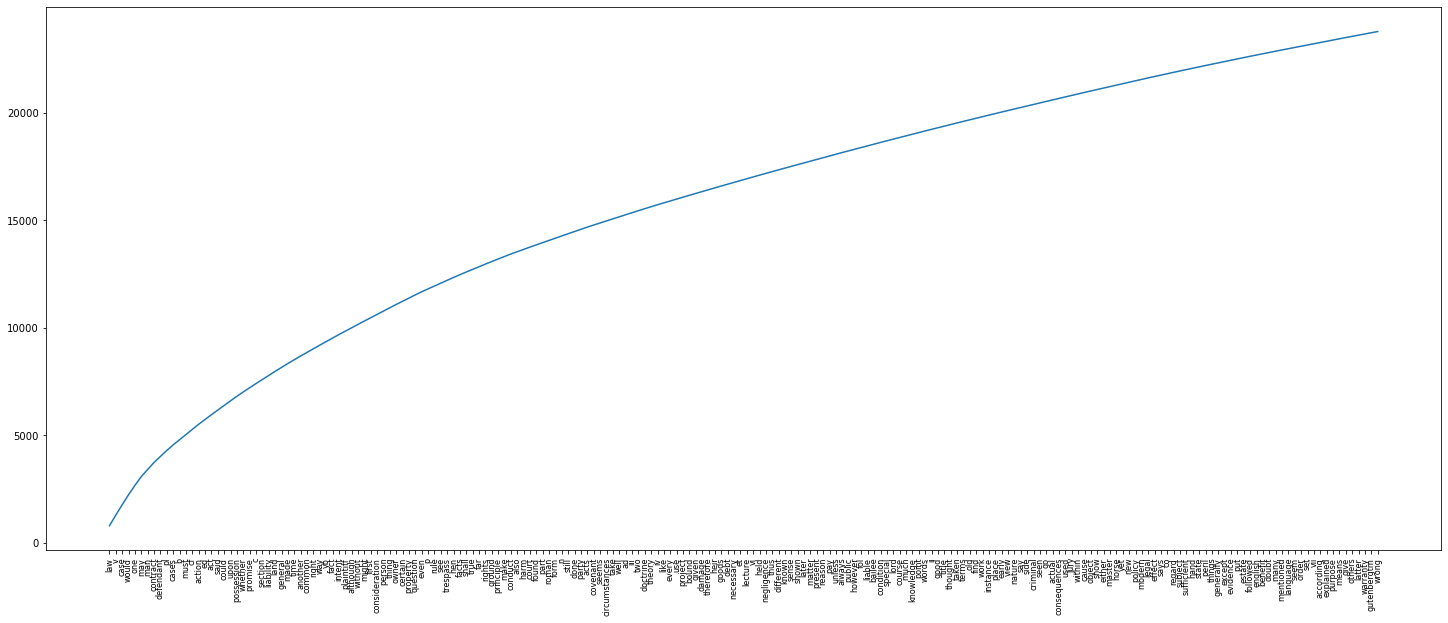

In [20]:
# https://python.gotrained.com/frequency-distribution-in-nltk/
x = top_words['Word']
y = top_words['Cumulative_Freq']

plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=8)
plt.plot(x,y)
plt.show()


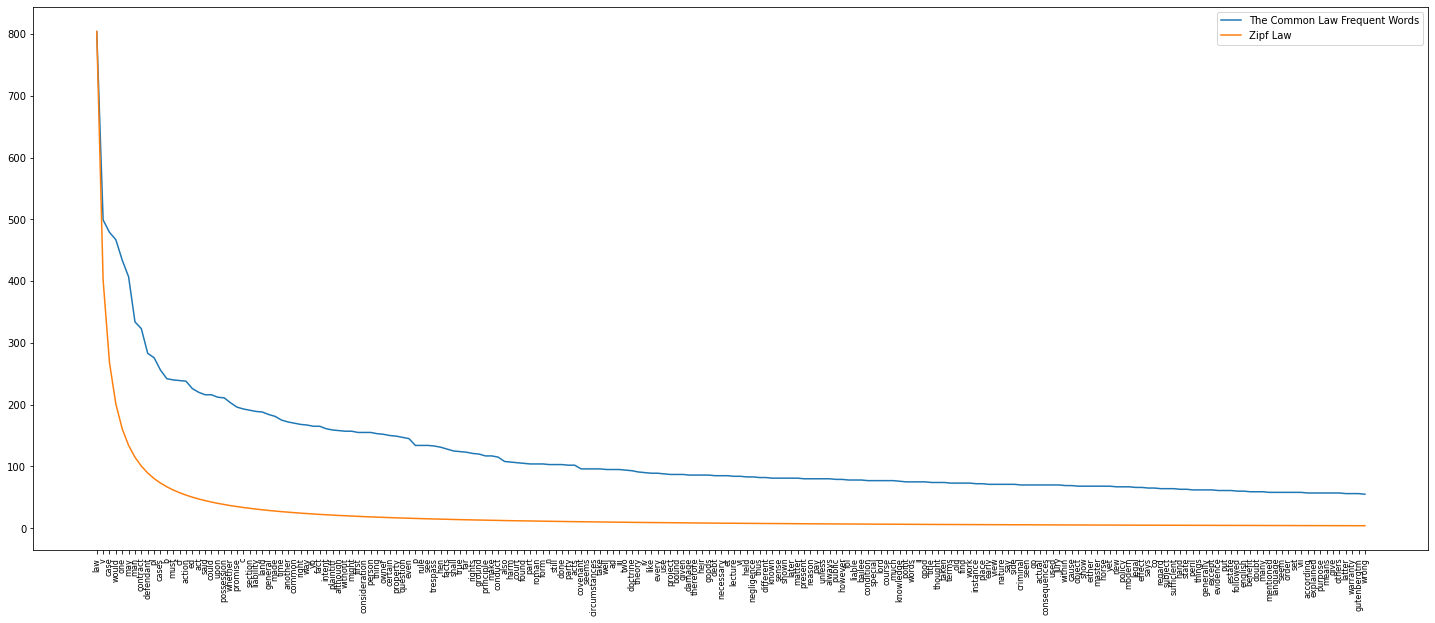

In [27]:
x = top_words['Word']
y = top_words['Frequency']
z = top_words['Zipf']

plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=8)
plt.plot(x,y, label = 'The Common Law Frequent Words')
plt.plot(x,z, label = 'Zipf Law')
plt.legend(loc="upper right")
plt.show()